In [1]:
import elli
from elli.fitting import ParamsHist, fit

# Load data
Load data collected with Sentech Ellipsometer and cut the spectral range (to use Si Aspnes file)

The sample is an ALD grown TiO2 sample (with 400 cycles) on commercially available SiO2 / Si substrate.

In [2]:
tss = elli.SpectraRay.read_psi_delta_file("test_TiO2/TiO2_400cycles.txt").loc[400:800]
ρ = elli.SpectraRay.read_rho("test_TiO2/TiO2_400cycles.txt").loc[400:800]

# Estimate Parameters and build model

In [3]:
params = ParamsHist()
params.add("SiO2_n0", value=1.452, min=-100, max=100, vary=False)
params.add("SiO2_n1", value=36.0, min=-40000, max=40000, vary=False)
params.add("SiO2_n2", value=0, min=-40000, max=40000, vary=False)
params.add("SiO2_k0", value=0, min=-100, max=100, vary=False)
params.add("SiO2_k1", value=0, min=-40000, max=40000, vary=False)
params.add("SiO2_k2", value=0, min=-40000, max=40000, vary=False)
params.add("SiO2_d", value=276.36, min=0, max=40000, vary=False)

params.add("TiO2_n0", value=2.236, min=-100, max=100, vary=True)
params.add("TiO2_n1", value=451, min=-40000, max=40000, vary=True)
params.add("TiO2_n2", value=251, min=-40000, max=40000, vary=True)
params.add("TiO2_k0", value=0, min=-100, max=100, vary=False)
params.add("TiO2_k1", value=0, min=-40000, max=40000, vary=False)
params.add("TiO2_k2", value=0, min=-40000, max=40000, vary=False)

params.add("TiO2_d", value=20, min=0, max=40000, vary=True)

In [4]:
@fit(tss, params)
def model(lbda, params):
    sr = elli.SpectraRay("./")
    Si = elli.IsotropicMaterial(sr.loadDispersionTable("test_TiO2/Si_Aspnes.mat"))

    SiO2 = elli.Cauchy(
        params["SiO2_n0"],
        params["SiO2_n1"],
        params["SiO2_n2"],
        params["SiO2_k0"],
        params["SiO2_k1"],
        params["SiO2_k2"],
    ).get_mat()
    TiO2 = elli.Cauchy(
        params["TiO2_n0"],
        params["TiO2_n1"],
        params["TiO2_n2"],
        params["TiO2_k0"],
        params["TiO2_k1"],
        params["TiO2_k2"],
    ).get_mat()

    Layer = [elli.Layer(TiO2, params["TiO2_d"]), elli.Layer(SiO2, params["SiO2_d"])]

    return elli.Structure(elli.AIR, Layer, Si).evaluate(lbda, 70, solver=elli.Solver2x2)

# Fit to experimental data

In [5]:
out = model.fit()
out

# Show fits

ValueError: 
    Invalid element(s) received for the 'data' property of 
        Invalid elements include: [<AxesSubplot:xlabel='Wavelength'>]

    The 'data' property is a tuple of trace instances
    that may be specified as:
      - A list or tuple of trace instances
        (e.g. [Scatter(...), Bar(...)])
      - A single trace instance
        (e.g. Scatter(...), Bar(...), etc.)
      - A list or tuple of dicts of string/value properties where:
        - The 'type' property specifies the trace type
            One of: ['bar', 'barpolar', 'box', 'candlestick',
                     'carpet', 'choropleth', 'choroplethmapbox',
                     'cone', 'contour', 'contourcarpet',
                     'densitymapbox', 'funnel', 'funnelarea',
                     'heatmap', 'heatmapgl', 'histogram',
                     'histogram2d', 'histogram2dcontour', 'icicle',
                     'image', 'indicator', 'isosurface', 'mesh3d',
                     'ohlc', 'parcats', 'parcoords', 'pie',
                     'pointcloud', 'sankey', 'scatter',
                     'scatter3d', 'scattercarpet', 'scattergeo',
                     'scattergl', 'scattermapbox', 'scatterpolar',
                     'scatterpolargl', 'scattersmith',
                     'scatterternary', 'splom', 'streamtube',
                     'sunburst', 'surface', 'table', 'treemap',
                     'violin', 'volume', 'waterfall']

        - All remaining properties are passed to the constructor of
          the specified trace type

        (e.g. [{'type': 'scatter', ...}, {'type': 'bar, ...}])

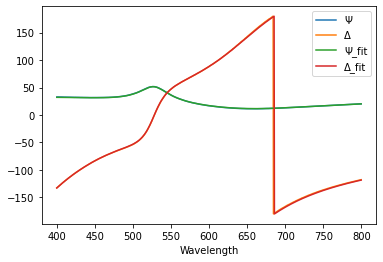

In [6]:
model.plot()

In [ ]:
model.plot_rho()